<a href="https://colab.research.google.com/github/Pree-om/diabetes_prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
#importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [173]:
dataset.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [174]:
dataset.isnull().sum() #to check missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [175]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Corellation Heatmap')

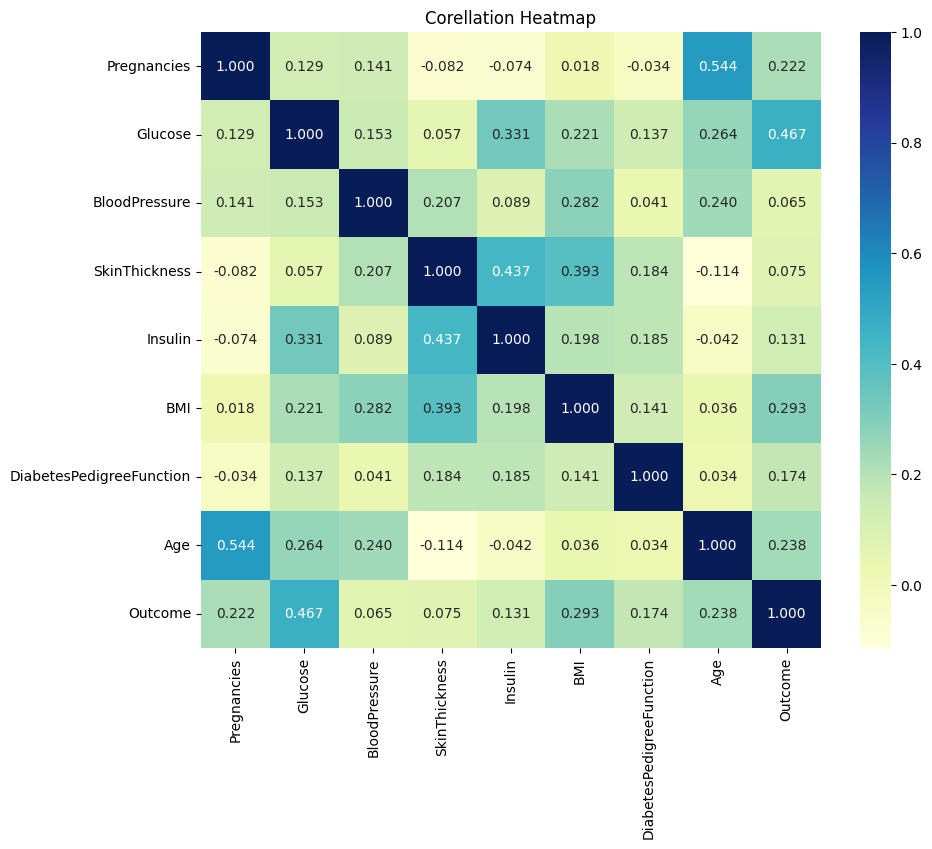

In [176]:
#EDA-Exploratory Data Analysis
#corellation plot of independent variales
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True, fmt='.3f',cmap='YlGnBu') #corr represent co-relation, fmt = no. of decimal places, cmap for colours, annot = put on values on the graph
plt.title('Corellation Heatmap')

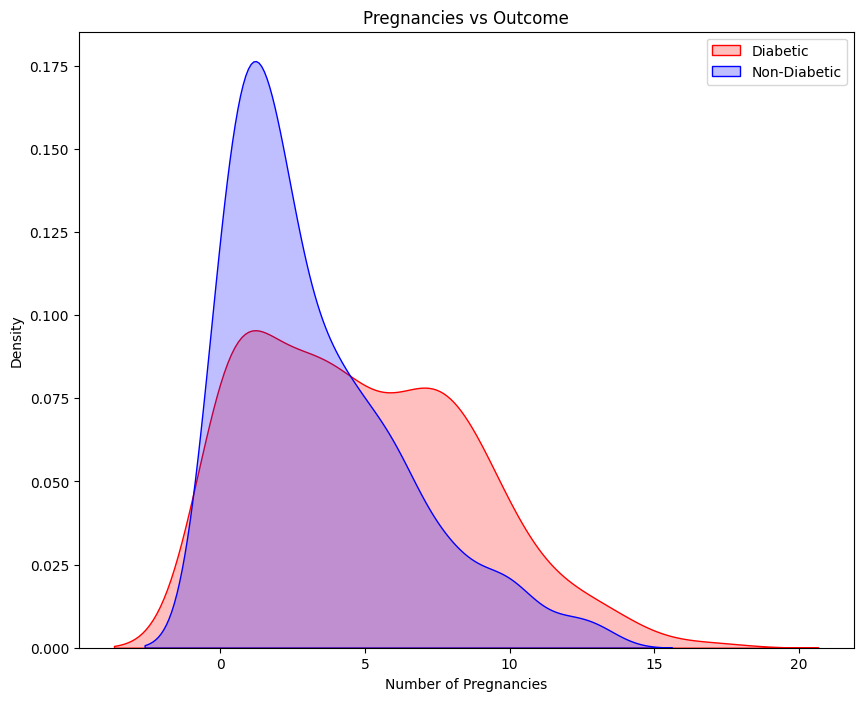

In [177]:
# Exploring 'Pregnancies' and target variable 'Outcome'
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
# Plot KDE for 'Pregnancies' where 'Outcome' is 1 (diabetic)
sns.kdeplot(dataset['Pregnancies'][dataset['Outcome'] == 1], color="red", fill=True, label='Diabetic')
# Plot KDE for 'Pregnancies' where 'Outcome' is 0 (non-diabetic)
sns.kdeplot(dataset['Pregnancies'][dataset['Outcome'] == 0], color="blue", fill=True, label='Non-Diabetic')
plt.title('Pregnancies vs Outcome')  # Set the title of the plot
plt.xlabel('Number of Pregnancies')  # Label x-axis
plt.ylabel('Density')  # Label y-axis
plt.legend()  # Display legend to differentiate between classes
plt.show()  # Render the plot

<ipython-input-178-5fd7cb99fece>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=dataset, inner='quart', linewidth=2, palette='muted')


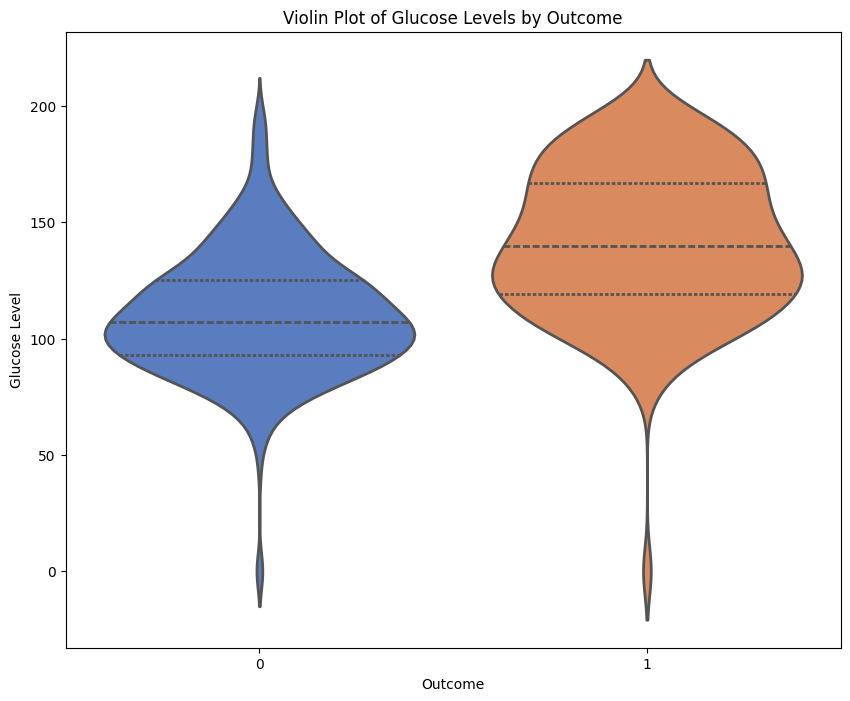

In [178]:
#Exploring 'Glucose' and target variable 'Outcome' using a violin plot
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
# Create a violin plot of 'Glucose' levels by 'Outcome'
sns.violinplot(x='Outcome', y='Glucose', data=dataset, inner='quart', linewidth=2, palette='muted')
plt.xlabel('Outcome')  # Label x-axis
plt.ylabel('Glucose Level')  # Label y-axis
plt.title('Violin Plot of Glucose Levels by Outcome')  # Set the title of the plot
plt.show()  # Render the plot

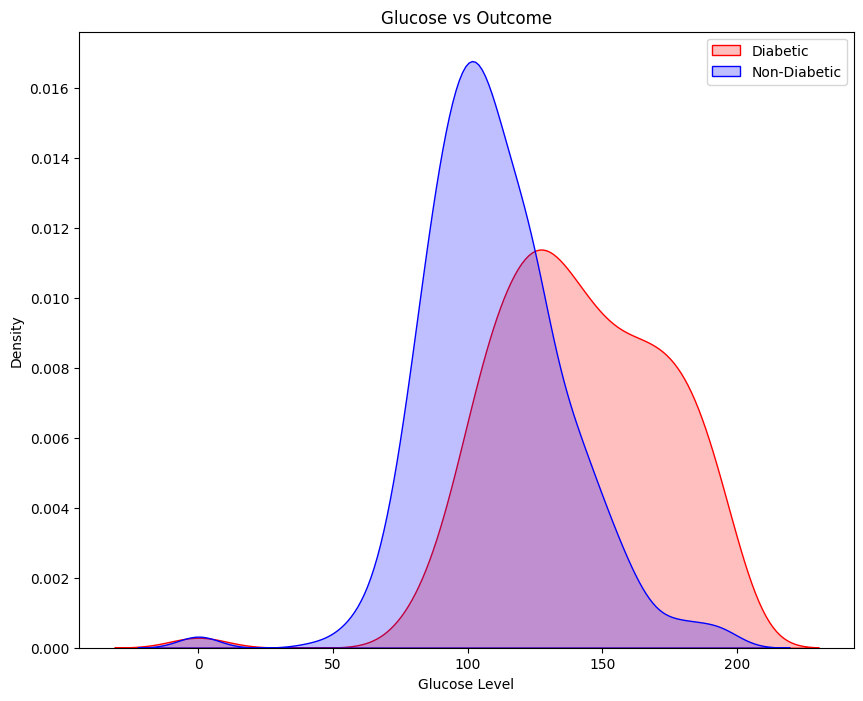

In [179]:
# Exploring 'Glucose' and 'Outcome' with KDE plots
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
# Plot KDE for 'Glucose' where 'Outcome' is 1 (diabetic)
sns.kdeplot(dataset['Glucose'][dataset['Outcome'] == 1], color="red", fill=True, label='Diabetic')
# Plot KDE for 'Glucose' where 'Outcome' is 0 (non-diabetic)
sns.kdeplot(dataset['Glucose'][dataset['Outcome'] == 0], color="blue", fill=True, label='Non-Diabetic')
plt.title('Glucose vs Outcome')  # Set the title of the plot
plt.xlabel('Glucose Level')
plt.ylabel('Density')
# Display legend
plt.legend()
plt.show()  # Ensures the plot is displayed correctly

In [180]:
# Replace zero values in 'Glucose' with the mean of the 'Glucose' column
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].mean())

# Replace zero values in 'BloodPressure' with the median of the 'BloodPressure' column
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())

# Replace zero values in 'BMI' with the mean of the 'BMI' column
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())

# Replace zero values in 'SkinThickness' with the mean of the 'SkinThickness' column
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())

# Replace zero values in 'Insulin' with the mean of the 'Insulin' column
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())


In [181]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [182]:
#Splitting the dependent ond independent variable
X = dataset.drop(["Outcome"], axis = 1)
y = dataset['Outcome']

In [183]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60,20.536458,79.799479,30.1,0.349,47


In [184]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [185]:
#splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42)

In [186]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115.0,98,20.536458,79.799479,24.0,1.022,34
223,7,142.0,60,33.000000,190.000000,28.8,0.687,61
393,4,116.0,72,12.000000,87.000000,22.1,0.463,37
766,1,126.0,60,20.536458,79.799479,30.1,0.349,47
570,3,78.0,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139.0,64,35.000000,140.000000,28.6,0.411,26
106,1,96.0,122,20.536458,79.799479,22.4,0.207,27
270,10,101.0,86,37.000000,79.799479,45.6,1.136,38
435,0,141.0,72,20.536458,79.799479,42.4,0.205,29


In [187]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.000000,58,33.000000,190.000000,34.0,0.430,43
324,2,112.000000,75,32.000000,79.799479,35.7,0.148,21
624,2,108.000000,64,20.536458,79.799479,30.8,0.158,21
690,8,107.000000,80,20.536458,79.799479,24.6,0.856,34
473,7,136.000000,90,20.536458,79.799479,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106.000000,70,37.000000,148.000000,39.4,0.605,22
429,1,95.000000,82,25.000000,180.000000,35.0,0.233,43
182,1,120.894531,74,20.000000,23.000000,27.7,0.299,21
586,8,143.000000,66,20.536458,79.799479,34.9,0.129,41


In [188]:
y_train

,Outcome
464,0
223,0
393,0
766,1
570,0
...,...
71,0
106,0
270,1
435,1


In [189]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
311,0
429,1
182,0
586,1


In [190]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [191]:
traning_accuracy = []
test_accuracy = []
for n_neighbors in range (1,11):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  traning_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

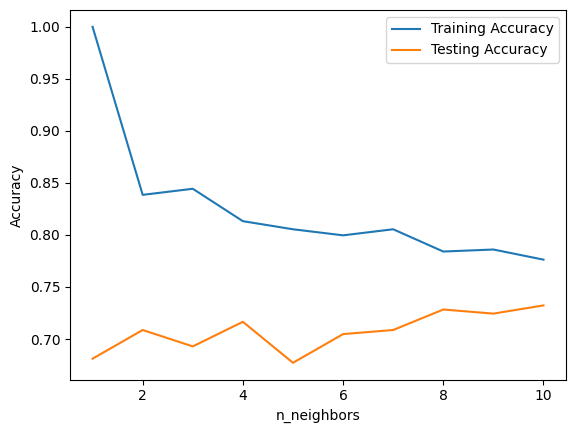

In [192]:
plt.plot(range(1,11), traning_accuracy, label = 'Training Accuracy')
plt.plot(range(1,11), test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [193]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), ": Training accuracy")
print(knn.score(X_test, y_test), ": Training accuracy")

0.7859922178988327 : Training accuracy
0.7244094488188977 : Training accuracy


In [194]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train),": Training accuracy")
print(dt.score(X_test,y_test),": Testing accuracy")

1.0 : Training accuracy
0.6811023622047244 : Testing accuracy


In [195]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=0, max_depth=9)
dt1.fit(X_train,y_train)
print(dt1.score(X_train,y_train),": Training accuracy")
print(dt1.score(X_test,y_test),": Testing accuracy")

0.9182879377431906 : Training accuracy
0.6929133858267716 : Testing accuracy


In [196]:
#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train), ": Training accuracy")
print(mlp.score(X_test, y_test), ": Testing accuracy")

0.7470817120622568 : Training accuracy
0.6614173228346457 : Testing accuracy


In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
mlp1 = MLPClassifier(random_state=42)
mlp1.fit(X_train, y_train)
print(mlp1.score(X_train, y_train), ": Training accuracy")
print(mlp1.score(X_test, y_test), ": Testing accuracy")

0.830739299610895 : Training accuracy
0.7322834645669292 : Testing accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
